In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

C:\Users\Srijanya ch\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("exoTrain.csv")
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [ ]:
df.index

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.mean()

In [ ]:
df.std()

In [ ]:
df.min()

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
df.duplicated()

In [ ]:
df.nunique()

In [ ]:
df.isnull().sum()

In [ ]:
df.isna().all()

In [ ]:
column=df.columns

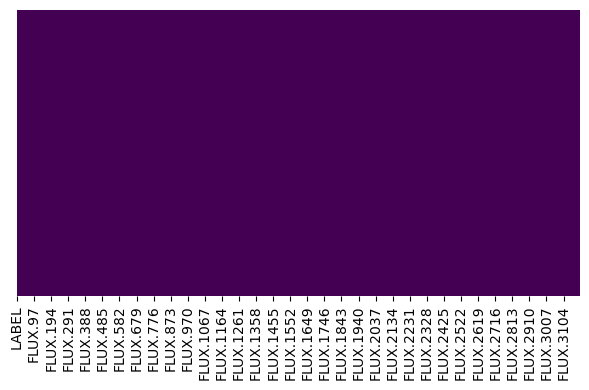

In [3]:
#Visualizing - NaN values - NULL
import seaborn as sns
import matplotlib.pyplot as plt
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()
get_heatmap(df)

<Figure size 2500x2500 with 0 Axes>

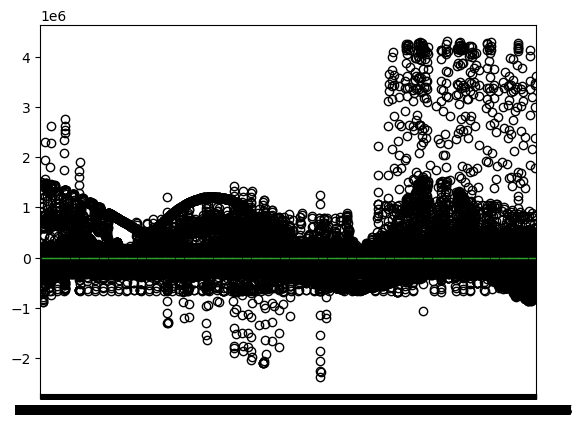

<Figure size 2500x2500 with 0 Axes>

In [4]:
df.plot.box()
plt.figure(figsize=(25, 25))

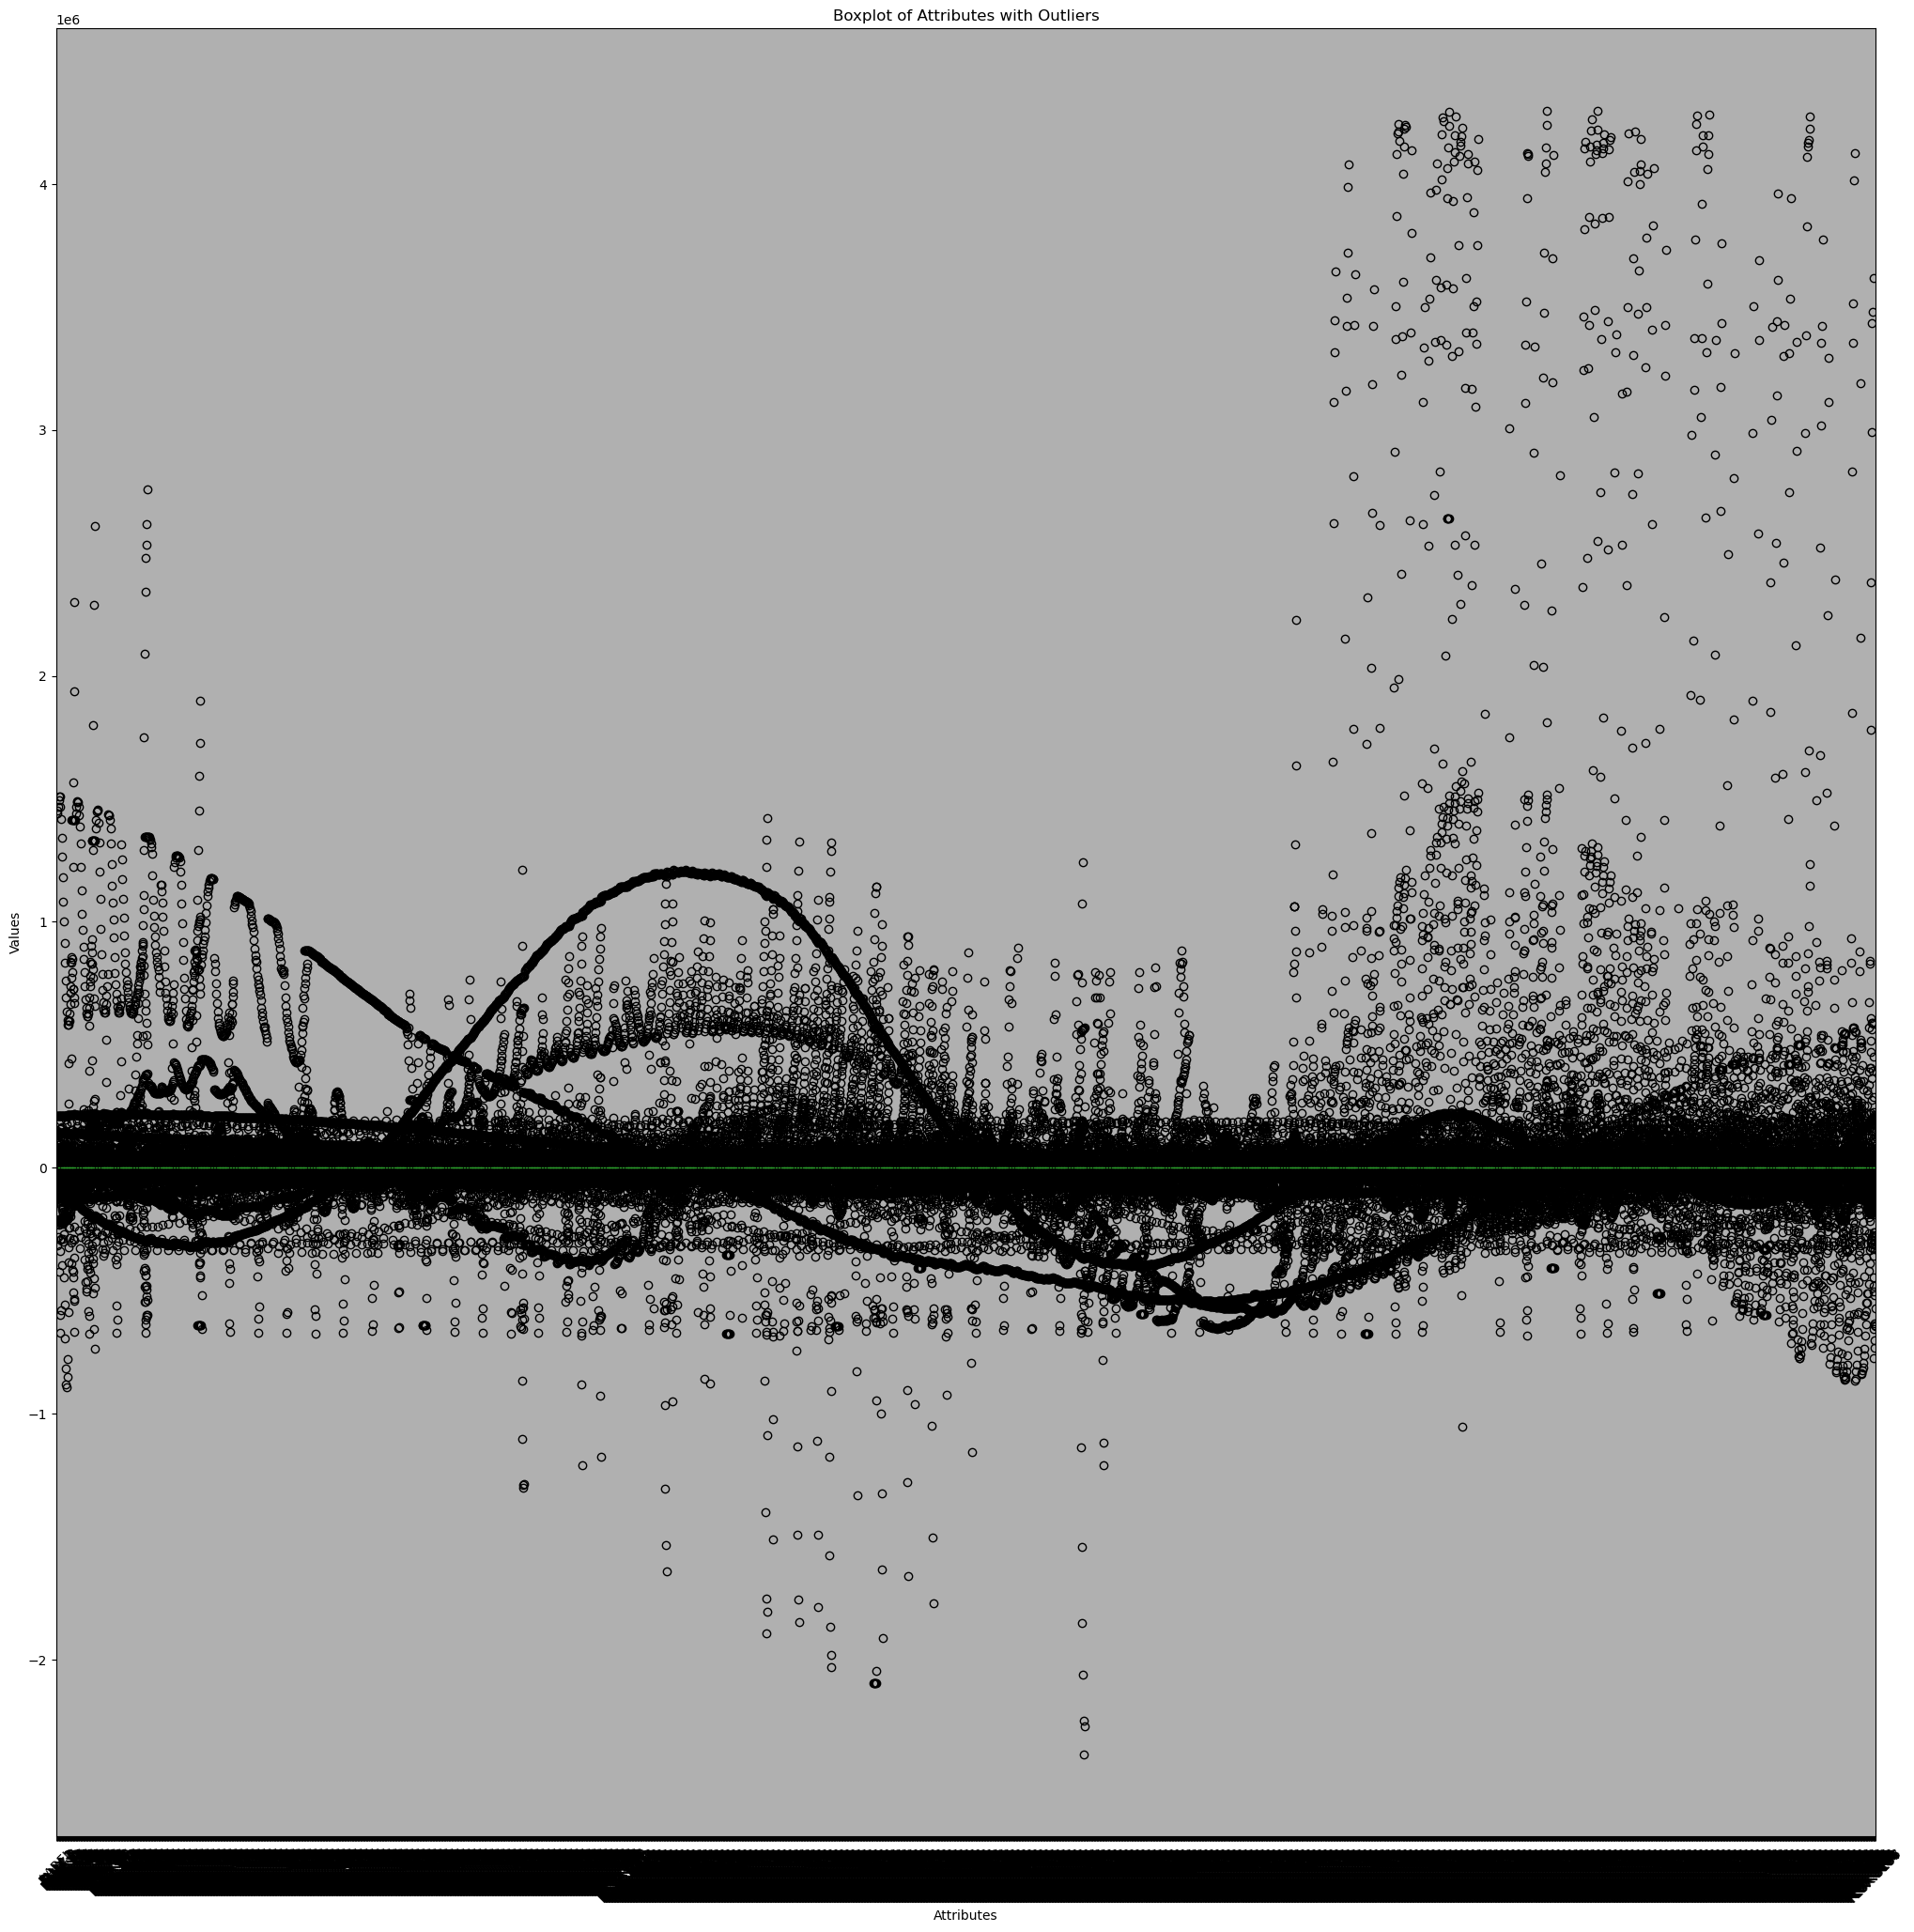

In [5]:
plt.figure(figsize=(25, 25))
df.boxplot()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplot of Attributes with Outliers')
plt.xlabel('Attributes')
plt.ylabel('Values')

# Show the plot
plt.show()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Remove outliers from the DataFrame
df_no_outliers = df[~outliers.any(axis=1)]

# Create a boxplot of attributes without outliers
plt.figure(figsize=(50, 50))
df_no_outliers.boxplot()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplot of Attributes without Outliers')
plt.xlabel('Attributes')
plt.ylabel('Values')

# Show the plot
plt.show()


NameError: name 'outliers' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('exoTrain.csv')

# Get the columns from the dataset
columns = df.columns

# Define the chunk size
chunk_size = 16  # You can adjust this value according to your preference

# Calculate the number of chunks
num_chunks = (len(columns) + chunk_size - 1) // chunk_size

# Define colors for box plots
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Iterate over the chunks
for chunk_index in range(num_chunks):
    start_index = chunk_index * chunk_size
    end_index = min((chunk_index + 1) * chunk_size, len(columns))
    
    # Get columns for the current chunk
    chunk_columns = columns[start_index:end_index]
    
    # Create a new figure for each chunk
    num_columns_chunk = len(chunk_columns)
    num_rows_chunk = (num_columns_chunk + 3) // 4
    fig, axes = plt.subplots(nrows=num_rows_chunk, ncols=4, figsize=(15, 4 * num_rows_chunk))
    
    # Plot box plots for each column in the chunk
    for i, column in enumerate(chunk_columns):
        ax = axes[i // 4, i % 4]
        df.boxplot(column=column, ax=ax, color=colors[i % len(colors)])  
        ax.set_title(column)
        
        # Remove outliers for each column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column][(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plots
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('exoTrain.csv')

# Function to remove outliers using IQR method
def remove_outliers(df):
    # Calculate Q1, Q3, and IQR for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    df_no_outliers = df[(df >= lower_bound) & (df <= upper_bound)]
    
    return df_no_outliers

# Remove outliers from the dataset
df_no_outliers = remove_outliers(df)

# Create a new figure for the boxplot
plt.figure(figsize=(25, 25))

# Create the boxplot without outliers
df_no_outliers.boxplot()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set title and labels
plt.title('Boxplot of Attributes without Outliers')
plt.xlabel('Attributes')
plt.ylabel('Values')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('exoTrain.csv')

# Select flux values from column 501
flux_501 = df.iloc[:, 501]

# Remove outliers from flux_501
Q1 = flux_501.quantile(0.25)
Q3 = flux_501.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
flux_501_no_outliers = flux_501[(flux_501 >= lower_bound) & (flux_501 <= upper_bound)]

# Create a box plot for flux_501 without outliers
plt.figure(figsize=(8, 6))
flux_501_no_outliers.plot.box()
plt.title('Boxplot of Flux Values from Column 501 (without outliers)')
plt.xlabel('Flux Values')
plt.ylabel('Column 501')
plt.grid(True)
plt.show()


In [ ]:
columns = ['FLUX.501']
df.boxplot(column=columns, showfliers=False, figsize=(10, 10))
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('exoTrain.csv')

# Create a box plot for all columns, excluding outliers
df.boxplot(showfliers=False, figsize=(15, 10))

# Set plot title and labels
plt.title('Boxplot of All Columns without Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
sns.scatterplot(x='FLUX.101',y ='FLUX.500',hue = 'LABEL',data = df,s=80)

In [ ]:
sns.boxenplot(data=df)

In [ ]:
sns.heatmap(df.corr())

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.title('Correlation in the data')
plt.show()

In [ ]:
colum=['FLUX.1', 'FLUX.2', 'FLUX.3', 'FLUX.4', 'FLUX.5', 'FLUX.6',
       'FLUX.7', 'FLUX.8', 'FLUX.9', 'FLUX.10', 'FLUX.11', 'FLUX.12', 'FLUX.13', 'FLUX.14', 'FLUX.15', 'FLUX.16', 'FLUX.17', 'FLUX.18', 'FLUX.19', 'FLUX.20', 'FLUX.21', 'FLUX.22', 'FLUX.23', 'FLUX.24', 'FLUX.25', 'FLUX.26', 'FLUX.27', 'FLUX.28', 'FLUX.29', 'FLUX.30', 'FLUX.31', 'FLUX.32', 'FLUX.33', 'FLUX.34', 'FLUX.35', 'FLUX.36', 'FLUX.37', 'FLUX.38', 'FLUX.39', 'FLUX.40', 'FLUX.41', 'FLUX.42', 'FLUX.43', 'FLUX.44', 'FLUX.45', 'FLUX.46', 'FLUX.47', 'FLUX.48', 'FLUX.49', 'FLUX.50', 'FLUX.51', 'FLUX.52', 'FLUX.53', 'FLUX.54', 'FLUX.55', 'FLUX.56', 'FLUX.57', 'FLUX.58', 'FLUX.59', 'FLUX.60', 'FLUX.61', 'FLUX.62', 'FLUX.63', 'FLUX.64', 'FLUX.65', 'FLUX.66', 'FLUX.67', 'FLUX.68', 'FLUX.69', 'FLUX.70', 'FLUX.71', 'FLUX.72', 'FLUX.73', 'FLUX.74', 'FLUX.75', 'FLUX.76', 'FLUX.77', 'FLUX.78', 'FLUX.79', 'FLUX.80', 'FLUX.81', 'FLUX.82', 'FLUX.83', 'FLUX.84', 'FLUX.85', 'FLUX.86', 'FLUX.87', 'FLUX.88', 'FLUX.89', 'FLUX.90', 'FLUX.91', 'FLUX.92', 'FLUX.93', 'FLUX.94', 'FLUX.95', 'FLUX.96', 'FLUX.97', 'FLUX.98', 'FLUX.99', 'FLUX.100', 'FLUX.101', 'FLUX.102', 'FLUX.103', 'FLUX.104', 'FLUX.105', 'FLUX.106', 'FLUX.107', 'FLUX.108', 'FLUX.109', 'FLUX.110', 'FLUX.111', 'FLUX.112', 'FLUX.113', 'FLUX.114', 'FLUX.115', 'FLUX.116', 'FLUX.117', 'FLUX.118', 'FLUX.119', 'FLUX.120', 'FLUX.121', 'FLUX.122', 'FLUX.123', 'FLUX.124', 'FLUX.125', 'FLUX.126', 'FLUX.127', 'FLUX.128', 'FLUX.129', 'FLUX.130', 'FLUX.131', 'FLUX.132', 'FLUX.133', 'FLUX.134', 'FLUX.135', 'FLUX.136', 'FLUX.137', 'FLUX.138', 'FLUX.139', 'FLUX.140', 'FLUX.141', 'FLUX.142', 'FLUX.143', 'FLUX.144', 'FLUX.145', 'FLUX.146', 'FLUX.147', 'FLUX.148', 'FLUX.149', 'FLUX.150', 'FLUX.151', 'FLUX.152', 'FLUX.153', 'FLUX.154', 'FLUX.155', 'FLUX.156', 'FLUX.157', 'FLUX.158', 'FLUX.159', 'FLUX.160', 'FLUX.161', 'FLUX.162', 'FLUX.163', 'FLUX.164', 'FLUX.165', 'FLUX.166', 'FLUX.167', 'FLUX.168', 'FLUX.169', 'FLUX.170', 'FLUX.171', 'FLUX.172', 'FLUX.173', 'FLUX.174', 'FLUX.175', 'FLUX.176', 'FLUX.177', 'FLUX.178', 'FLUX.179', 'FLUX.180', 'FLUX.181', 'FLUX.182', 'FLUX.183', 'FLUX.184', 'FLUX.185', 'FLUX.186', 'FLUX.187', 'FLUX.188', 'FLUX.189', 'FLUX.190', 'FLUX.191', 'FLUX.192', 'FLUX.193', 'FLUX.194', 'FLUX.195', 'FLUX.196', 'FLUX.197', 'FLUX.198', 'FLUX.199', 'FLUX.200', 'FLUX.201', 'FLUX.202', 'FLUX.203', 'FLUX.204', 'FLUX.205', 'FLUX.206', 'FLUX.207', 'FLUX.208', 'FLUX.209', 'FLUX.210', 'FLUX.211', 'FLUX.212', 'FLUX.213', 'FLUX.214', 'FLUX.215', 'FLUX.216', 'FLUX.217', 'FLUX.218', 'FLUX.219', 'FLUX.220', 'FLUX.221', 'FLUX.222', 'FLUX.223', 'FLUX.224', 'FLUX.225', 'FLUX.226', 'FLUX.227', 'FLUX.228', 'FLUX.229', 'FLUX.230', 'FLUX.231', 'FLUX.232', 'FLUX.233', 'FLUX.234', 'FLUX.235', 'FLUX.236', 'FLUX.237', 'FLUX.238', 'FLUX.239', 'FLUX.240', 'FLUX.241', 'FLUX.242', 'FLUX.243', 'FLUX.244', 'FLUX.245', 'FLUX.246', 'FLUX.247', 'FLUX.248', 'FLUX.249', 'FLUX.250', 'FLUX.251', 'FLUX.252', 'FLUX.253', 'FLUX.254', 'FLUX.255', 'FLUX.256', 'FLUX.257', 'FLUX.258', 'FLUX.259', 'FLUX.260', 'FLUX.261', 'FLUX.262', 'FLUX.263', 'FLUX.264', 'FLUX.265', 'FLUX.266', 'FLUX.267', 'FLUX.268', 'FLUX.269', 'FLUX.270', 'FLUX.271', 'FLUX.272', 'FLUX.273', 'FLUX.274', 'FLUX.275', 'FLUX.276', 'FLUX.277', 'FLUX.278', 'FLUX.279', 'FLUX.280', 'FLUX.281', 'FLUX.282', 'FLUX.283', 'FLUX.284', 'FLUX.285', 'FLUX.286', 'FLUX.287', 'FLUX.288', 'FLUX.289', 'FLUX.290', 'FLUX.291', 'FLUX.292', 'FLUX.293', 'FLUX.294', 'FLUX.295', 'FLUX.296', 'FLUX.297', 'FLUX.298', 'FLUX.299', 'FLUX.300', 'FLUX.301', 'FLUX.302', 'FLUX.303', 'FLUX.304', 'FLUX.305', 'FLUX.306', 'FLUX.307', 'FLUX.308', 'FLUX.309', 'FLUX.310', 'FLUX.311', 'FLUX.312', 'FLUX.313', 'FLUX.314', 'FLUX.315', 'FLUX.316', 'FLUX.317', 'FLUX.318', 'FLUX.319', 'FLUX.320', 'FLUX.321', 'FLUX.322', 'FLUX.323', 'FLUX.324', 'FLUX.325', 'FLUX.326', 'FLUX.327', 'FLUX.328', 'FLUX.329', 'FLUX.330', 'FLUX.331', 'FLUX.332', 'FLUX.333', 'FLUX.334', 'FLUX.335', 'FLUX.336', 'FLUX.337', 'FLUX.338', 'FLUX.339', 'FLUX.340', 'FLUX.341', 'FLUX.342', 'FLUX.343', 'FLUX.344', 'FLUX.345', 'FLUX.346', 'FLUX.347', 'FLUX.348', 'FLUX.349', 'FLUX.350', 'FLUX.351', 'FLUX.352', 'FLUX.353', 'FLUX.354', 'FLUX.355', 'FLUX.356', 'FLUX.357', 'FLUX.358', 'FLUX.359', 'FLUX.360', 'FLUX.361', 'FLUX.362', 'FLUX.363', 'FLUX.364', 'FLUX.365', 'FLUX.366', 'FLUX.367', 'FLUX.368', 'FLUX.369', 'FLUX.370', 'FLUX.371', 'FLUX.372', 'FLUX.373', 'FLUX.374', 'FLUX.375', 'FLUX.376', 'FLUX.377', 'FLUX.378', 'FLUX.379', 'FLUX.380', 'FLUX.381', 'FLUX.382', 'FLUX.383', 'FLUX.384', 'FLUX.385', 'FLUX.386', 'FLUX.387', 'FLUX.388', 'FLUX.389', 'FLUX.390', 'FLUX.391', 'FLUX.392', 'FLUX.393', 'FLUX.394', 'FLUX.395', 'FLUX.396', 'FLUX.397', 'FLUX.398', 'FLUX.399', 'FLUX.400', 'FLUX.401', 'FLUX.402', 'FLUX.403', 'FLUX.404', 'FLUX.405', 'FLUX.406', 'FLUX.407', 'FLUX.408', 'FLUX.409', 'FLUX.410', 'FLUX.411', 'FLUX.412', 'FLUX.413', 'FLUX.414', 'FLUX.415', 'FLUX.416', 'FLUX.417', 'FLUX.418', 'FLUX.419', 'FLUX.420', 'FLUX.421', 'FLUX.422', 'FLUX.423', 'FLUX.424', 'FLUX.425', 'FLUX.426', 'FLUX.427', 'FLUX.428', 'FLUX.429', 'FLUX.430', 'FLUX.431', 'FLUX.432', 'FLUX.433', 'FLUX.434', 'FLUX.435', 'FLUX.436', 'FLUX.437', 'FLUX.438', 'FLUX.439', 'FLUX.440', 'FLUX.441', 'FLUX.442', 'FLUX.443', 'FLUX.444', 'FLUX.445', 'FLUX.446', 'FLUX.447', 'FLUX.448', 'FLUX.449', 'FLUX.450', 'FLUX.451', 'FLUX.452', 'FLUX.453', 'FLUX.454', 'FLUX.455', 'FLUX.456', 'FLUX.457', 'FLUX.458', 'FLUX.459', 'FLUX.460', 'FLUX.461', 'FLUX.462', 'FLUX.463', 'FLUX.464', 'FLUX.465', 'FLUX.466', 'FLUX.467', 'FLUX.468', 'FLUX.469', 'FLUX.470', 'FLUX.471', 'FLUX.472', 'FLUX.473', 'FLUX.474', 'FLUX.475', 'FLUX.476', 'FLUX.477', 'FLUX.478', 'FLUX.479', 'FLUX.480', 'FLUX.481', 'FLUX.482', 'FLUX.483', 'FLUX.484', 'FLUX.485', 'FLUX.486', 'FLUX.487', 'FLUX.488', 'FLUX.489', 'FLUX.490', 'FLUX.491', 'FLUX.492', 'FLUX.493', 'FLUX.494', 'FLUX.495', 'FLUX.496', 'FLUX.497', 'FLUX.498', 'FLUX.499', 'FLUX.500', 'FLUX.501', 'FLUX.502', 'FLUX.503', 'FLUX.504', 'FLUX.505', 'FLUX.506', 'FLUX.507', 'FLUX.508', 'FLUX.509', 'FLUX.510', 'FLUX.511', 'FLUX.512', 'FLUX.513', 'FLUX.514', 'FLUX.515', 'FLUX.516', 'FLUX.517', 'FLUX.518', 'FLUX.519', 'FLUX.520', 'FLUX.521', 'FLUX.522', 'FLUX.523', 'FLUX.524', 'FLUX.525', 'FLUX.526', 'FLUX.527', 'FLUX.528', 'FLUX.529', 'FLUX.530', 'FLUX.531', 'FLUX.532', 'FLUX.533', 'FLUX.534', 'FLUX.535', 'FLUX.536', 'FLUX.537', 'FLUX.538', 'FLUX.539', 'FLUX.540', 'FLUX.541', 'FLUX.542', 'FLUX.543', 'FLUX.544', 'FLUX.545', 'FLUX.546', 'FLUX.547', 'FLUX.548', 'FLUX.549', 'FLUX.550', 'FLUX.551', 'FLUX.552', 'FLUX.553', 'FLUX.554', 'FLUX.555', 'FLUX.556', 'FLUX.557', 'FLUX.558', 'FLUX.559', 'FLUX.560', 'FLUX.561', 'FLUX.562', 'FLUX.563', 'FLUX.564', 'FLUX.565', 'FLUX.566', 'FLUX.567', 'FLUX.568', 'FLUX.569', 'FLUX.570', 'FLUX.571', 'FLUX.572', 'FLUX.573', 'FLUX.574', 'FLUX.575', 'FLUX.576', 'FLUX.577', 'FLUX.578', 'FLUX.579', 'FLUX.580', 'FLUX.581', 'FLUX.582', 'FLUX.583', 'FLUX.584', 'FLUX.585', 'FLUX.586', 'FLUX.587', 'FLUX.588', 'FLUX.589', 'FLUX.590', 'FLUX.591', 'FLUX.592', 'FLUX.593', 'FLUX.594', 'FLUX.595', 'FLUX.596', 'FLUX.597', 'FLUX.598', 'FLUX.599', 'FLUX.600', 'FLUX.601', 'FLUX.602', 'FLUX.603', 'FLUX.604', 'FLUX.605', 'FLUX.606', 'FLUX.607', 'FLUX.608', 'FLUX.609', 'FLUX.610', 'FLUX.611', 'FLUX.612', 'FLUX.613', 'FLUX.614', 'FLUX.615', 'FLUX.616', 'FLUX.617', 'FLUX.618', 'FLUX.619', 'FLUX.620', 'FLUX.621', 'FLUX.622', 'FLUX.623', 'FLUX.624', 'FLUX.625', 'FLUX.626', 'FLUX.627', 'FLUX.628', 'FLUX.629', 'FLUX.630', 'FLUX.631', 'FLUX.632', 'FLUX.633', 'FLUX.634', 'FLUX.635', 'FLUX.636', 'FLUX.637', 'FLUX.638', 'FLUX.639', 'FLUX.640', 'FLUX.641', 'FLUX.642', 'FLUX.643', 'FLUX.644', 'FLUX.645', 'FLUX.646', 'FLUX.647', 'FLUX.648', 'FLUX.649', 'FLUX.650', 'FLUX.651', 'FLUX.652', 'FLUX.653', 'FLUX.654', 'FLUX.655', 'FLUX.656', 'FLUX.657', 'FLUX.658', 'FLUX.659', 'FLUX.660', 'FLUX.661', 'FLUX.662', 'FLUX.663', 'FLUX.664', 'FLUX.665', 'FLUX.666', 'FLUX.667', 'FLUX.668', 'FLUX.669', 'FLUX.670', 'FLUX.671', 'FLUX.672', 'FLUX.673', 'FLUX.674', 'FLUX.675', 'FLUX.676', 'FLUX.677', 'FLUX.678', 'FLUX.679', 'FLUX.680', 'FLUX.681', 'FLUX.682', 'FLUX.683', 'FLUX.684', 'FLUX.685', 'FLUX.686', 'FLUX.687', 'FLUX.688', 'FLUX.689', 'FLUX.690', 'FLUX.691', 'FLUX.692', 'FLUX.693', 'FLUX.694', 'FLUX.695', 'FLUX.696', 'FLUX.697', 'FLUX.698', 'FLUX.699', 'FLUX.700', 'FLUX.701', 'FLUX.702', 'FLUX.703', 'FLUX.704', 'FLUX.705', 'FLUX.706', 'FLUX.707', 'FLUX.708', 'FLUX.709', 'FLUX.710', 'FLUX.711', 'FLUX.712', 'FLUX.713', 'FLUX.714', 'FLUX.715', 'FLUX.716', 'FLUX.717', 'FLUX.718', 'FLUX.719', 'FLUX.720', 'FLUX.721', 'FLUX.722', 'FLUX.723', 'FLUX.724', 'FLUX.725', 'FLUX.726', 'FLUX.727', 'FLUX.728', 'FLUX.729', 'FLUX.730', 'FLUX.731', 'FLUX.732', 'FLUX.733', 'FLUX.734', 'FLUX.735', 'FLUX.736', 'FLUX.737', 'FLUX.738', 'FLUX.739', 'FLUX.740', 'FLUX.741', 'FLUX.742', 'FLUX.743', 'FLUX.744', 'FLUX.745', 'FLUX.746', 'FLUX.747', 'FLUX.748', 'FLUX.749', 'FLUX.750', 'FLUX.751', 'FLUX.752', 'FLUX.753', 'FLUX.754', 'FLUX.755', 'FLUX.756', 'FLUX.757', 'FLUX.758', 'FLUX.759', 'FLUX.760', 'FLUX.761', 'FLUX.762', 'FLUX.763', 'FLUX.764', 'FLUX.765', 'FLUX.766', 'FLUX.767', 'FLUX.768', 'FLUX.769', 'FLUX.770', 'FLUX.771', 'FLUX.772', 'FLUX.773', 'FLUX.774', 'FLUX.775', 'FLUX.776', 'FLUX.777', 'FLUX.778', 'FLUX.779', 'FLUX.780', 'FLUX.781', 'FLUX.782', 'FLUX.783', 'FLUX.784', 'FLUX.785', 'FLUX.786', 'FLUX.787', 'FLUX.788', 'FLUX.789', 'FLUX.790', 'FLUX.791', 'FLUX.792', 'FLUX.793', 'FLUX.794', 'FLUX.795', 'FLUX.796', 'FLUX.797', 'FLUX.798', 'FLUX.799', 'FLUX.800', 'FLUX.801', 'FLUX.802', 'FLUX.803', 'FLUX.804', 'FLUX.805', 'FLUX.806', 'FLUX.807', 'FLUX.808', 'FLUX.809', 'FLUX.810', 'FLUX.811', 'FLUX.812', 'FLUX.813', 'FLUX.814', 'FLUX.815', 'FLUX.816', 'FLUX.817', 'FLUX.818', 'FLUX.819', 'FLUX.820', 'FLUX.821', 'FLUX.822', 'FLUX.823', 'FLUX.824', 'FLUX.825', 'FLUX.826', 'FLUX.827', 'FLUX.828', 'FLUX.829', 'FLUX.830', 'FLUX.831', 'FLUX.832', 'FLUX.833', 'FLUX.834', 'FLUX.835', 'FLUX.836', 'FLUX.837', 'FLUX.838', 'FLUX.839', 'FLUX.840', 'FLUX.841', 'FLUX.842', 'FLUX.843', 'FLUX.844', 'FLUX.845', 'FLUX.846', 'FLUX.847', 
         'FLUX.848', 'FLUX.849', 'FLUX.850', 'FLUX.851', 'FLUX.852', 'FLUX.853', 'FLUX.854', 'FLUX.855', 'FLUX.856', 'FLUX.857', 'FLUX.858', 'FLUX.859', 'FLUX.860', 'FLUX.861', 'FLUX.862', 'FLUX.863', 'FLUX.864', 'FLUX.865', 'FLUX.866', 'FLUX.867', 'FLUX.868', 'FLUX.869', 'FLUX.870', 'FLUX.871', 'FLUX.872', 'FLUX.873', 'FLUX.874', 'FLUX.875', 'FLUX.876', 'FLUX.877', 'FLUX.878', 'FLUX.879', 'FLUX.880', 'FLUX.881', 'FLUX.882', 'FLUX.883', 'FLUX.884', 'FLUX.885', 'FLUX.886', 'FLUX.887', 'FLUX.888', 'FLUX.889', 'FLUX.890', 'FLUX.891', 'FLUX.892', 'FLUX.893', 'FLUX.894', 'FLUX.895', 'FLUX.896', 'FLUX.897', 'FLUX.898', 'FLUX.899', 'FLUX.900', 'FLUX.901', 'FLUX.902', 'FLUX.903', 'FLUX.904', 'FLUX.905', 'FLUX.906', 'FLUX.907', 'FLUX.908', 'FLUX.909', 'FLUX.910', 'FLUX.911', 'FLUX.912', 'FLUX.913', 'FLUX.914', 'FLUX.915', 'FLUX.916', 'FLUX.917', 'FLUX.918', 'FLUX.919', 'FLUX.920', 'FLUX.921', 'FLUX.922', 'FLUX.923', 'FLUX.924', 'FLUX.925', 'FLUX.926', 'FLUX.927', 'FLUX.928', 'FLUX.929', 'FLUX.930', 'FLUX.931', 'FLUX.932', 'FLUX.933', 'FLUX.934', 'FLUX.935', 'FLUX.936', 'FLUX.937', 'FLUX.938', 'FLUX.939', 'FLUX.940', 'FLUX.941', 'FLUX.942', 'FLUX.943', 'FLUX.944', 'FLUX.945', 'FLUX.946', 'FLUX.947', 'FLUX.948', 'FLUX.949', 'FLUX.950', 'FLUX.951', 'FLUX.952', 'FLUX.953', 'FLUX.954', 'FLUX.955', 'FLUX.956', 'FLUX.957', 'FLUX.958', 'FLUX.959', 'FLUX.960', 'FLUX.961', 'FLUX.962', 'FLUX.963', 'FLUX.964', 'FLUX.965', 'FLUX.966', 'FLUX.967', 'FLUX.968', 'FLUX.969', 'FLUX.970', 'FLUX.971', 'FLUX.972', 'FLUX.973', 'FLUX.974', 'FLUX.975', 'FLUX.976', 'FLUX.977', 'FLUX.978', 'FLUX.979', 'FLUX.980', 'FLUX.981', 'FLUX.982', 'FLUX.983', 'FLUX.984', 'FLUX.985', 'FLUX.986', 'FLUX.987', 'FLUX.988', 'FLUX.989', 'FLUX.990', 'FLUX.991', 'FLUX.992', 'FLUX.993', 'FLUX.994', 'FLUX.995', 'FLUX.996', 'FLUX.997', 'FLUX.998', 'FLUX.999', 'FLUX.1000', 'FLUX.1001', 'FLUX.1002', 'FLUX.1003', 'FLUX.1004', 'FLUX.1005', 'FLUX.1006', 'FLUX.1007', 'FLUX.1008', 'FLUX.1009', 'FLUX.1010', 'FLUX.1011', 'FLUX.1012', 'FLUX.1013', 'FLUX.1014', 'FLUX.1015', 'FLUX.1016', 'FLUX.1017', 'FLUX.1018', 'FLUX.1019', 'FLUX.1020', 'FLUX.1021', 'FLUX.1022', 'FLUX.1023', 'FLUX.1024', 'FLUX.1025', 'FLUX.1026', 'FLUX.1027', 'FLUX.1028', 'FLUX.1029', 'FLUX.1030', 'FLUX.1031', 'FLUX.1032', 'FLUX.1033', 'FLUX.1034', 'FLUX.1035', 'FLUX.1036', 'FLUX.1037', 'FLUX.1038', 'FLUX.1039', 'FLUX.1040', 'FLUX.1041', 'FLUX.1042', 'FLUX.1043', 'FLUX.1044', 'FLUX.1045', 'FLUX.1046', 'FLUX.1047', 'FLUX.1048', 'FLUX.1049', 'FLUX.1050', 'FLUX.1051', 'FLUX.1052', 'FLUX.1053', 'FLUX.1054', 'FLUX.1055', 'FLUX.1056', 'FLUX.1057', 'FLUX.1058', 'FLUX.1059', 'FLUX.1060', 'FLUX.1061', 'FLUX.1062', 'FLUX.1063', 'FLUX.1064', 'FLUX.1065', 'FLUX.1066', 'FLUX.1067', 'FLUX.1068', 'FLUX.1069', 'FLUX.1070', 'FLUX.1071', 'FLUX.1072', 'FLUX.1073', 'FLUX.1074', 'FLUX.1075', 'FLUX.1076', 'FLUX.1077', 'FLUX.1078', 'FLUX.1079', 'FLUX.1080', 'FLUX.1081', 'FLUX.1082', 'FLUX.1083', 'FLUX.1084', 'FLUX.1085', 'FLUX.1086', 'FLUX.1087', 'FLUX.1088', 'FLUX.1089', 'FLUX.1090', 'FLUX.1091', 'FLUX.1092', 'FLUX.1093', 'FLUX.1094', 'FLUX.1095', 'FLUX.1096', 'FLUX.1097', 'FLUX.1098', 'FLUX.1099', 'FLUX.1100', 'FLUX.1101', 'FLUX.1102', 'FLUX.1103', 'FLUX.1104', 'FLUX.1105', 'FLUX.1106', 'FLUX.1107', 'FLUX.1108', 'FLUX.1109', 'FLUX.1110', 'FLUX.1111', 'FLUX.1112', 'FLUX.1113', 'FLUX.1114', 'FLUX.1115', 'FLUX.1116', 'FLUX.1117', 'FLUX.1118', 'FLUX.1119', 'FLUX.1120', 'FLUX.1121', 'FLUX.1122', 'FLUX.1123', 'FLUX.1124', 'FLUX.1125', 'FLUX.1126', 'FLUX.1127', 'FLUX.1128', 'FLUX.1129', 'FLUX.1130', 'FLUX.1131', 'FLUX.1132', 'FLUX.1133', 'FLUX.1134', 'FLUX.1135', 'FLUX.1136', 'FLUX.1137', 'FLUX.1138', 'FLUX.1139', 'FLUX.1140', 'FLUX.1141', 'FLUX.1142', 'FLUX.1143', 'FLUX.1144', 'FLUX.1145', 'FLUX.1146', 'FLUX.1147', 'FLUX.1148', 'FLUX.1149', 'FLUX.1150', 'FLUX.1151', 'FLUX.1152', 'FLUX.1153', 'FLUX.1154', 'FLUX.1155', 'FLUX.1156', 'FLUX.1157', 'FLUX.1158', 'FLUX.1159', 'FLUX.1160', 'FLUX.1161', 'FLUX.1162', 'FLUX.1163', 'FLUX.1164', 'FLUX.1165', 'FLUX.1166', 'FLUX.1167', 'FLUX.1168', 'FLUX.1169', 'FLUX.1170', 'FLUX.1171', 'FLUX.1172', 'FLUX.1173', 'FLUX.1174', 'FLUX.1175', 'FLUX.1176', 'FLUX.1177', 'FLUX.1178', 'FLUX.1179', 'FLUX.1180', 'FLUX.1181', 'FLUX.1182', 'FLUX.1183', 'FLUX.1184', 'FLUX.1185', 'FLUX.1186', 'FLUX.1187', 'FLUX.1188', 'FLUX.1189', 'FLUX.1190', 'FLUX.1191', 'FLUX.1192', 'FLUX.1193', 'FLUX.1194', 'FLUX.1195', 'FLUX.1196', 'FLUX.1197', 'FLUX.1198', 'FLUX.1199', 'FLUX.1200', 'FLUX.1201', 'FLUX.1202', 'FLUX.1203', 'FLUX.1204', 'FLUX.1205', 'FLUX.1206', 'FLUX.1207', 'FLUX.1208', 'FLUX.1209', 'FLUX.1210', 'FLUX.1211', 'FLUX.1212', 'FLUX.1213', 'FLUX.1214', 'FLUX.1215', 'FLUX.1216', 'FLUX.1217', 'FLUX.1218', 'FLUX.1219', 'FLUX.1220', 'FLUX.1221', 'FLUX.1222', 'FLUX.1223', 'FLUX.1224', 'FLUX.1225', 'FLUX.1226', 'FLUX.1227', 'FLUX.1228', 'FLUX.1229', 'FLUX.1230', 'FLUX.1231', 'FLUX.1232', 'FLUX.1233', 'FLUX.1234', 'FLUX.1235', 'FLUX.1236', 'FLUX.1237', 'FLUX.1238', 'FLUX.1239', 'FLUX.1240', 'FLUX.1241', 'FLUX.1242', 'FLUX.1243', 'FLUX.1244', 'FLUX.1245', 'FLUX.1246', 'FLUX.1247', 'FLUX.1248', 'FLUX.1249', 'FLUX.1250', 'FLUX.1251', 'FLUX.1252', 'FLUX.1253', 'FLUX.1254', 'FLUX.1255', 'FLUX.1256', 'FLUX.1257', 'FLUX.1258', 'FLUX.1259', 'FLUX.1260', 'FLUX.1261', 'FLUX.1262', 'FLUX.1263', 'FLUX.1264', 'FLUX.1265', 'FLUX.1266', 'FLUX.1267', 'FLUX.1268', 'FLUX.1269', 'FLUX.1270', 'FLUX.1271', 'FLUX.1272', 'FLUX.1273', 'FLUX.1274', 'FLUX.1275', 'FLUX.1276', 'FLUX.1277', 'FLUX.1278', 'FLUX.1279', 'FLUX.1280', 'FLUX.1281', 'FLUX.1282', 'FLUX.1283', 'FLUX.1284', 'FLUX.1285', 'FLUX.1286', 'FLUX.1287', 'FLUX.1288', 'FLUX.1289', 'FLUX.1290', 'FLUX.1291', 'FLUX.1292', 'FLUX.1293', 'FLUX.1294', 'FLUX.1295', 'FLUX.1296', 'FLUX.1297', 'FLUX.1298', 'FLUX.1299', 'FLUX.1300', 'FLUX.1301', 'FLUX.1302', 'FLUX.1303', 'FLUX.1304', 'FLUX.1305', 'FLUX.1306', 'FLUX.1307', 'FLUX.1308', 'FLUX.1309', 'FLUX.1310', 'FLUX.1311', 'FLUX.1312', 'FLUX.1313', 'FLUX.1314', 'FLUX.1315', 'FLUX.1316', 'FLUX.1317', 'FLUX.1318', 'FLUX.1319', 'FLUX.1320', 'FLUX.1321', 'FLUX.1322', 'FLUX.1323', 'FLUX.1324', 'FLUX.1325', 'FLUX.1326', 'FLUX.1327', 'FLUX.1328', 'FLUX.1329', 'FLUX.1330', 'FLUX.1331', 'FLUX.1332', 'FLUX.1333', 'FLUX.1334', 'FLUX.1335', 'FLUX.1336', 'FLUX.1337', 'FLUX.1338', 'FLUX.1339', 'FLUX.1340', 'FLUX.1341', 'FLUX.1342', 'FLUX.1343', 'FLUX.1344', 'FLUX.1345', 'FLUX.1346', 'FLUX.1347', 'FLUX.1348', 'FLUX.1349', 'FLUX.1350', 'FLUX.1351', 'FLUX.1352', 'FLUX.1353', 'FLUX.1354', 'FLUX.1355', 'FLUX.1356', 'FLUX.1357', 'FLUX.1358', 'FLUX.1359', 'FLUX.1360', 'FLUX.1361', 'FLUX.1362', 'FLUX.1363', 'FLUX.1364', 'FLUX.1365', 'FLUX.1366', 'FLUX.1367', 'FLUX.1368', 'FLUX.1369', 'FLUX.1370', 'FLUX.1371', 'FLUX.1372', 'FLUX.1373', 'FLUX.1374', 'FLUX.1375', 'FLUX.1376', 'FLUX.1377', 'FLUX.1378', 'FLUX.1379', 'FLUX.1380', 'FLUX.1381', 'FLUX.1382', 'FLUX.1383', 'FLUX.1384', 'FLUX.1385', 'FLUX.1386', 'FLUX.1387', 'FLUX.1388', 'FLUX.1389', 'FLUX.1390', 'FLUX.1391', 'FLUX.1392', 'FLUX.1393', 'FLUX.1394', 'FLUX.1395', 'FLUX.1396', 'FLUX.1397', 'FLUX.1398', 'FLUX.1399', 'FLUX.1400', 'FLUX.1401', 'FLUX.1402', 'FLUX.1403', 'FLUX.1404', 'FLUX.1405', 'FLUX.1406', 'FLUX.1407', 'FLUX.1408', 'FLUX.1409', 'FLUX.1410', 'FLUX.1411', 'FLUX.1412', 'FLUX.1413', 'FLUX.1414', 'FLUX.1415', 'FLUX.1416', 'FLUX.1417', 'FLUX.1418', 'FLUX.1419', 'FLUX.1420', 'FLUX.1421', 'FLUX.1422', 'FLUX.1423', 'FLUX.1424', 'FLUX.1425', 'FLUX.1426', 'FLUX.1427', 'FLUX.1428', 'FLUX.1429', 'FLUX.1430', 'FLUX.1431', 'FLUX.1432', 'FLUX.1433', 'FLUX.1434', 'FLUX.1435', 'FLUX.1436', 'FLUX.1437', 'FLUX.1438', 'FLUX.1439', 'FLUX.1440', 'FLUX.1441', 'FLUX.1442', 'FLUX.1443', 'FLUX.1444', 'FLUX.1445', 'FLUX.1446', 'FLUX.1447', 'FLUX.1448', 'FLUX.1449', 'FLUX.1450', 'FLUX.1451', 'FLUX.1452', 'FLUX.1453', 'FLUX.1454', 'FLUX.1455', 'FLUX.1456', 'FLUX.1457', 'FLUX.1458', 'FLUX.1459', 'FLUX.1460', 'FLUX.1461', 'FLUX.1462', 'FLUX.1463', 'FLUX.1464', 'FLUX.1465', 'FLUX.1466', 'FLUX.1467', 'FLUX.1468', 'FLUX.1469', 'FLUX.1470', 'FLUX.1471', 'FLUX.1472', 'FLUX.1473', 'FLUX.1474', 'FLUX.1475', 'FLUX.1476', 'FLUX.1477', 'FLUX.1478', 'FLUX.1479', 'FLUX.1480', 'FLUX.1481', 'FLUX.1482', 'FLUX.1483', 'FLUX.1484', 'FLUX.1485', 'FLUX.1486', 'FLUX.1487', 'FLUX.1488', 'FLUX.1489', 'FLUX.1490', 'FLUX.1491', 'FLUX.1492', 'FLUX.1493', 'FLUX.1494', 'FLUX.1495', 'FLUX.1496', 'FLUX.1497', 'FLUX.1498', 'FLUX.1499', 'FLUX.1500', 'FLUX.1501', 'FLUX.1502', 'FLUX.1503', 'FLUX.1504', 'FLUX.1505', 'FLUX.1506', 'FLUX.1507', 'FLUX.1508', 'FLUX.1509', 'FLUX.1510', 'FLUX.1511', 'FLUX.1512', 'FLUX.1513', 'FLUX.1514', 'FLUX.1515', 'FLUX.1516', 'FLUX.1517', 'FLUX.1518', 'FLUX.1519', 'FLUX.1520', 'FLUX.1521', 'FLUX.1522', 'FLUX.1523', 'FLUX.1524', 'FLUX.1525', 'FLUX.1526', 'FLUX.1527', 'FLUX.1528', 'FLUX.1529', 'FLUX.1530', 'FLUX.1531', 'FLUX.1532', 'FLUX.1533', 'FLUX.1534', 'FLUX.1535', 'FLUX.1536', 'FLUX.1537', 'FLUX.1538', 'FLUX.1539', 'FLUX.1540', 'FLUX.1541', 'FLUX.1542', 'FLUX.1543', 'FLUX.1544', 
         'FLUX.1545', 'FLUX.1546', 'FLUX.1547', 'FLUX.1548', 'FLUX.1549', 'FLUX.1550', 'FLUX.1551', 'FLUX.1552', 'FLUX.1553', 'FLUX.1554', 'FLUX.1555', 'FLUX.1556', 'FLUX.1557', 'FLUX.1558', 'FLUX.1559', 'FLUX.1560', 'FLUX.1561', 'FLUX.1562', 'FLUX.1563', 'FLUX.1564', 'FLUX.1565', 'FLUX.1566', 'FLUX.1567', 'FLUX.1568', 'FLUX.1569', 'FLUX.1570', 'FLUX.1571', 'FLUX.1572', 'FLUX.1573', 'FLUX.1574', 'FLUX.1575', 'FLUX.1576', 'FLUX.1577', 'FLUX.1578', 'FLUX.1579', 'FLUX.1580', 'FLUX.1581', 'FLUX.1582', 'FLUX.1583', 'FLUX.1584', 'FLUX.1585', 'FLUX.1586', 'FLUX.1587', 'FLUX.1588', 'FLUX.1589', 'FLUX.1590', 'FLUX.1591', 'FLUX.1592', 'FLUX.1593', 'FLUX.1594', 'FLUX.1595', 'FLUX.1596', 'FLUX.1597', 'FLUX.1598', 'FLUX.1599', 'FLUX.1600', 'FLUX.1601', 'FLUX.1602', 'FLUX.1603', 'FLUX.1604', 'FLUX.1605', 'FLUX.1606', 'FLUX.1607', 'FLUX.1608', 'FLUX.1609', 'FLUX.1610', 'FLUX.1611', 'FLUX.1612', 'FLUX.1613', 'FLUX.1614', 'FLUX.1615', 'FLUX.1616', 'FLUX.1617', 'FLUX.1618', 'FLUX.1619', 'FLUX.1620', 'FLUX.1621', 'FLUX.1622', 'FLUX.1623', 'FLUX.1624', 'FLUX.1625', 'FLUX.1626', 'FLUX.1627', 'FLUX.1628', 'FLUX.1629', 'FLUX.1630', 'FLUX.1631', 'FLUX.1632', 'FLUX.1633', 'FLUX.1634', 'FLUX.1635', 'FLUX.1636', 'FLUX.1637', 'FLUX.1638', 'FLUX.1639', 'FLUX.1640', 'FLUX.1641', 'FLUX.1642', 'FLUX.1643', 'FLUX.1644', 'FLUX.1645', 'FLUX.1646', 'FLUX.1647', 'FLUX.1648', 'FLUX.1649', 'FLUX.1650', 'FLUX.1651', 'FLUX.1652', 'FLUX.1653', 'FLUX.1654', 'FLUX.1655', 'FLUX.1656', 'FLUX.1657', 'FLUX.1658', 'FLUX.1659', 'FLUX.1660', 'FLUX.1661', 'FLUX.1662', 'FLUX.1663', 'FLUX.1664', 'FLUX.1665', 'FLUX.1666', 'FLUX.1667', 'FLUX.1668', 'FLUX.1669', 'FLUX.1670', 'FLUX.1671', 'FLUX.1672', 'FLUX.1673', 'FLUX.1674', 'FLUX.1675', 'FLUX.1676', 'FLUX.1677', 'FLUX.1678', 'FLUX.1679', 'FLUX.1680', 'FLUX.1681', 'FLUX.1682', 'FLUX.1683', 'FLUX.1684', 'FLUX.1685', 'FLUX.1686', 'FLUX.1687', 'FLUX.1688', 'FLUX.1689', 'FLUX.1690', 'FLUX.1691', 'FLUX.1692', 'FLUX.1693', 'FLUX.1694', 'FLUX.1695', 'FLUX.1696', 'FLUX.1697', 'FLUX.1698', 'FLUX.1699', 'FLUX.1700', 'FLUX.1701', 'FLUX.1702', 'FLUX.1703', 'FLUX.1704', 'FLUX.1705', 'FLUX.1706', 'FLUX.1707', 'FLUX.1708', 'FLUX.1709', 'FLUX.1710', 'FLUX.1711', 'FLUX.1712', 'FLUX.1713', 'FLUX.1714', 'FLUX.1715', 'FLUX.1716', 'FLUX.1717', 'FLUX.1718', 'FLUX.1719', 'FLUX.1720', 'FLUX.1721', 'FLUX.1722', 'FLUX.1723', 'FLUX.1724', 'FLUX.1725', 'FLUX.1726', 'FLUX.1727', 'FLUX.1728', 'FLUX.1729', 'FLUX.1730', 'FLUX.1731', 'FLUX.1732', 'FLUX.1733', 'FLUX.1734', 'FLUX.1735', 'FLUX.1736', 'FLUX.1737', 'FLUX.1738', 'FLUX.1739', 'FLUX.1740', 'FLUX.1741', 'FLUX.1742', 'FLUX.1743', 'FLUX.1744', 'FLUX.1745', 'FLUX.1746', 'FLUX.1747', 'FLUX.1748', 'FLUX.1749', 'FLUX.1750', 'FLUX.1751', 'FLUX.1752', 'FLUX.1753', 'FLUX.1754', 'FLUX.1755', 'FLUX.1756', 'FLUX.1757', 'FLUX.1758', 'FLUX.1759', 'FLUX.1760', 'FLUX.1761', 'FLUX.1762', 'FLUX.1763', 'FLUX.1764', 'FLUX.1765', 'FLUX.1766', 'FLUX.1767', 'FLUX.1768', 'FLUX.1769', 'FLUX.1770', 'FLUX.1771', 'FLUX.1772', 'FLUX.1773', 'FLUX.1774', 'FLUX.1775', 'FLUX.1776', 'FLUX.1777', 'FLUX.1778', 'FLUX.1779', 'FLUX.1780', 'FLUX.1781', 'FLUX.1782', 'FLUX.1783', 'FLUX.1784', 'FLUX.1785', 'FLUX.1786', 'FLUX.1787', 'FLUX.1788', 'FLUX.1789', 'FLUX.1790', 'FLUX.1791', 'FLUX.1792', 'FLUX.1793', 'FLUX.1794', 'FLUX.1795', 'FLUX.1796', 'FLUX.1797', 'FLUX.1798', 'FLUX.1799', 'FLUX.1800', 'FLUX.1801', 'FLUX.1802', 'FLUX.1803', 'FLUX.1804', 'FLUX.1805', 'FLUX.1806', 'FLUX.1807', 'FLUX.1808', 'FLUX.1809', 'FLUX.1810', 'FLUX.1811', 'FLUX.1812', 'FLUX.1813', 'FLUX.1814', 'FLUX.1815', 'FLUX.1816', 'FLUX.1817', 'FLUX.1818', 'FLUX.1819', 'FLUX.1820', 'FLUX.1821', 'FLUX.1822', 'FLUX.1823', 'FLUX.1824', 'FLUX.1825', 'FLUX.1826', 'FLUX.1827', 'FLUX.1828', 'FLUX.1829', 'FLUX.1830', 'FLUX.1831', 'FLUX.1832', 'FLUX.1833', 'FLUX.1834', 'FLUX.1835', 'FLUX.1836', 'FLUX.1837', 'FLUX.1838', 'FLUX.1839', 'FLUX.1840', 'FLUX.1841', 'FLUX.1842', 'FLUX.1843', 'FLUX.1844', 'FLUX.1845', 'FLUX.1846', 'FLUX.1847', 'FLUX.1848', 'FLUX.1849', 'FLUX.1850', 'FLUX.1851', 'FLUX.1852', 'FLUX.1853', 'FLUX.1854', 'FLUX.1855', 'FLUX.1856', 'FLUX.1857', 'FLUX.1858', 'FLUX.1859', 'FLUX.1860', 'FLUX.1861', 'FLUX.1862', 'FLUX.1863', 'FLUX.1864', 'FLUX.1865', 'FLUX.1866', 'FLUX.1867', 'FLUX.1868', 'FLUX.1869', 'FLUX.1870', 'FLUX.1871', 'FLUX.1872', 'FLUX.1873', 'FLUX.1874', 'FLUX.1875', 'FLUX.1876', 'FLUX.1877', 'FLUX.1878', 'FLUX.1879', 'FLUX.1880', 'FLUX.1881', 'FLUX.1882', 'FLUX.1883', 'FLUX.1884', 'FLUX.1885', 'FLUX.1886', 'FLUX.1887', 'FLUX.1888', 'FLUX.1889', 'FLUX.1890', 'FLUX.1891', 'FLUX.1892', 'FLUX.1893', 'FLUX.1894', 'FLUX.1895', 'FLUX.1896', 'FLUX.1897', 'FLUX.1898', 'FLUX.1899', 'FLUX.1900', 'FLUX.1901', 'FLUX.1902', 'FLUX.1903', 'FLUX.1904', 'FLUX.1905', 'FLUX.1906', 'FLUX.1907', 'FLUX.1908', 'FLUX.1909', 'FLUX.1910', 'FLUX.1911', 'FLUX.1912', 'FLUX.1913', 'FLUX.1914', 'FLUX.1915', 'FLUX.1916', 'FLUX.1917', 'FLUX.1918', 'FLUX.1919', 'FLUX.1920', 'FLUX.1921', 'FLUX.1922', 'FLUX.1923', 'FLUX.1924', 'FLUX.1925', 'FLUX.1926', 'FLUX.1927', 'FLUX.1928', 'FLUX.1929', 'FLUX.1930', 'FLUX.1931', 'FLUX.1932', 'FLUX.1933', 'FLUX.1934', 'FLUX.1935', 'FLUX.1936', 'FLUX.1937', 'FLUX.1938', 
         'FLUX.1939', 'FLUX.1940', 'FLUX.1941', 'FLUX.1942', 'FLUX.1943', 'FLUX.1944', 'FLUX.1945', 'FLUX.1946', 'FLUX.1947', 'FLUX.1948', 'FLUX.1949', 'FLUX.1950', 'FLUX.1951', 'FLUX.1952', 'FLUX.1953', 'FLUX.1954', 'FLUX.1955', 'FLUX.1956', 'FLUX.1957', 'FLUX.1958', 'FLUX.1959', 'FLUX.1960', 'FLUX.1961', 'FLUX.1962', 'FLUX.1963', 'FLUX.1964', 'FLUX.1965', 'FLUX.1966', 'FLUX.1967', 'FLUX.1968', 'FLUX.1969', 'FLUX.1970', 'FLUX.1971', 'FLUX.1972', 'FLUX.1973', 'FLUX.1974', 'FLUX.1975', 'FLUX.1976', 'FLUX.1977', 'FLUX.1978', 'FLUX.1979', 'FLUX.1980', 'FLUX.1981', 'FLUX.1982', 'FLUX.1983', 'FLUX.1984', 'FLUX.1985', 'FLUX.1986', 'FLUX.1987', 'FLUX.1988', 'FLUX.1989', 'FLUX.1990', 'FLUX.1991', 'FLUX.1992', 'FLUX.1993', 'FLUX.1994', 'FLUX.1995', 'FLUX.1996', 'FLUX.1997', 'FLUX.1998', 'FLUX.1999', 'FLUX.2000', 'FLUX.2001', 'FLUX.2002', 'FLUX.2003', 'FLUX.2004', 'FLUX.2005', 'FLUX.2006', 'FLUX.2007', 'FLUX.2008', 'FLUX.2009', 'FLUX.2010', 'FLUX.2011', 'FLUX.2012', 'FLUX.2013', 'FLUX.2014', 'FLUX.2015', 'FLUX.2016', 'FLUX.2017', 'FLUX.2018', 'FLUX.2019', 'FLUX.2020', 'FLUX.2021', 'FLUX.2022', 'FLUX.2023', 'FLUX.2024', 'FLUX.2025', 'FLUX.2026', 'FLUX.2027', 'FLUX.2028', 'FLUX.2029', 'FLUX.2030', 'FLUX.2031', 'FLUX.2032', 'FLUX.2033', 'FLUX.2034', 'FLUX.2035', 'FLUX.2036', 'FLUX.2037', 'FLUX.2038', 'FLUX.2039', 'FLUX.2040', 'FLUX.2041', 'FLUX.2042', 'FLUX.2043', 'FLUX.2044', 'FLUX.2045', 'FLUX.2046', 'FLUX.2047', 'FLUX.2048', 'FLUX.2049', 'FLUX.2050', 'FLUX.2051', 'FLUX.2052', 'FLUX.2053', 'FLUX.2054', 'FLUX.2055', 'FLUX.2056', 'FLUX.2057', 'FLUX.2058', 'FLUX.2059', 'FLUX.2060', 'FLUX.2061', 'FLUX.2062', 'FLUX.2063', 'FLUX.2064', 'FLUX.2065', 'FLUX.2066', 'FLUX.2067', 'FLUX.2068', 'FLUX.2069', 'FLUX.2070', 'FLUX.2071', 'FLUX.2072', 'FLUX.2073', 'FLUX.2074', 'FLUX.2075', 'FLUX.2076', 'FLUX.2077', 'FLUX.2078', 'FLUX.2079', 'FLUX.2080', 'FLUX.2081', 'FLUX.2082', 'FLUX.2083', 'FLUX.2084', 'FLUX.2085', 'FLUX.2086', 'FLUX.2087', 'FLUX.2088', 'FLUX.2089', 'FLUX.2090', 'FLUX.2091', 'FLUX.2092', 'FLUX.2093', 'FLUX.2094', 'FLUX.2095', 'FLUX.2096', 'FLUX.2097', 'FLUX.2098', 'FLUX.2099', 'FLUX.2100', 'FLUX.2101', 'FLUX.2102', 'FLUX.2103', 'FLUX.2104', 'FLUX.2105', 'FLUX.2106', 'FLUX.2107', 'FLUX.2108', 'FLUX.2109', 'FLUX.2110', 'FLUX.2111', 'FLUX.2112', 'FLUX.2113', 'FLUX.2114', 'FLUX.2115', 'FLUX.2116', 'FLUX.2117', 'FLUX.2118', 'FLUX.2119', 'FLUX.2120', 'FLUX.2121', 'FLUX.2122', 'FLUX.2123', 'FLUX.2124', 'FLUX.2125', 'FLUX.2126', 'FLUX.2127', 'FLUX.2128', 'FLUX.2129', 'FLUX.2130', 'FLUX.2131', 'FLUX.2132', 'FLUX.2133', 'FLUX.2134', 'FLUX.2135', 'FLUX.2136', 'FLUX.2137', 'FLUX.2138', 'FLUX.2139', 'FLUX.2140', 'FLUX.2141', 'FLUX.2142', 'FLUX.2143', 'FLUX.2144', 'FLUX.2145', 'FLUX.2146', 'FLUX.2147', 'FLUX.2148', 'FLUX.2149', 'FLUX.2150', 'FLUX.2151', 'FLUX.2152', 'FLUX.2153', 'FLUX.2154', 'FLUX.2155', 'FLUX.2156', 'FLUX.2157', 'FLUX.2158', 'FLUX.2159', 'FLUX.2160', 'FLUX.2161', 'FLUX.2162', 'FLUX.2163', 'FLUX.2164', 'FLUX.2165', 'FLUX.2166', 'FLUX.2167', 'FLUX.2168', 'FLUX.2169', 'FLUX.2170', 'FLUX.2171', 'FLUX.2172', 'FLUX.2173', 'FLUX.2174', 'FLUX.2175', 'FLUX.2176', 'FLUX.2177', 'FLUX.2178', 'FLUX.2179', 'FLUX.2180', 'FLUX.2181', 'FLUX.2182', 'FLUX.2183', 'FLUX.2184', 'FLUX.2185', 'FLUX.2186', 'FLUX.2187', 'FLUX.2188', 'FLUX.2189', 'FLUX.2190', 'FLUX.2191', 'FLUX.2192', 'FLUX.2193', 'FLUX.2194', 'FLUX.2195', 'FLUX.2196', 'FLUX.2197', 'FLUX.2198', 'FLUX.2199', 'FLUX.2200', 'FLUX.2201', 'FLUX.2202', 'FLUX.2203', 'FLUX.2204', 'FLUX.2205', 'FLUX.2206', 'FLUX.2207', 'FLUX.2208', 'FLUX.2209', 'FLUX.2210', 'FLUX.2211', 'FLUX.2212', 'FLUX.2213', 'FLUX.2214', 'FLUX.2215', 'FLUX.2216', 'FLUX.2217', 'FLUX.2218', 'FLUX.2219', 'FLUX.2220', 'FLUX.2221', 'FLUX.2222', 'FLUX.2223', 'FLUX.2224', 'FLUX.2225', 'FLUX.2226', 'FLUX.2227', 'FLUX.2228', 'FLUX.2229', 'FLUX.2230', 'FLUX.2231', 'FLUX.2232', 'FLUX.2233', 'FLUX.2234', 'FLUX.2235', 'FLUX.2236', 'FLUX.2237', 'FLUX.2238', 'FLUX.2239', 'FLUX.2240', 'FLUX.2241', 'FLUX.2242', 'FLUX.2243', 'FLUX.2244', 'FLUX.2245', 'FLUX.2246', 'FLUX.2247', 'FLUX.2248', 'FLUX.2249', 'FLUX.2250', 'FLUX.2251', 'FLUX.2252', 'FLUX.2253', 'FLUX.2254', 'FLUX.2255', 'FLUX.2256', 'FLUX.2257', 'FLUX.2258', 'FLUX.2259', 'FLUX.2260', 'FLUX.2261', 'FLUX.2262', 'FLUX.2263', 'FLUX.2264', 'FLUX.2265', 'FLUX.2266', 'FLUX.2267', 'FLUX.2268', 'FLUX.2269', 'FLUX.2270', 'FLUX.2271', 'FLUX.2272', 'FLUX.2273', 'FLUX.2274', 'FLUX.2275', 'FLUX.2276', 'FLUX.2277', 'FLUX.2278', 'FLUX.2279', 'FLUX.2280', 'FLUX.2281', 'FLUX.2282', 'FLUX.2283', 'FLUX.2284', 'FLUX.2285', 'FLUX.2286', 'FLUX.2287', 'FLUX.2288', 'FLUX.2289', 'FLUX.2290', 'FLUX.2291', 'FLUX.2292', 'FLUX.2293', 'FLUX.2294', 'FLUX.2295', 'FLUX.2296', 'FLUX.2297', 'FLUX.2298', 'FLUX.2299', 'FLUX.2300', 'FLUX.2301', 'FLUX.2302', 'FLUX.2303', 'FLUX.2304', 'FLUX.2305', 'FLUX.2306', 'FLUX.2307', 'FLUX.2308', 'FLUX.2309', 'FLUX.2310', 'FLUX.2311', 'FLUX.2312', 'FLUX.2313', 'FLUX.2314', 'FLUX.2315', 'FLUX.2316', 'FLUX.2317', 'FLUX.2318', 'FLUX.2319', 'FLUX.2320', 'FLUX.2321', 'FLUX.2322', 'FLUX.2323', 'FLUX.2324', 'FLUX.2325', 'FLUX.2326', 'FLUX.2327', 'FLUX.2328', 'FLUX.2329', 'FLUX.2330', 'FLUX.2331', 'FLUX.2332', 'FLUX.2333', 'FLUX.2334', 'FLUX.2335', 'FLUX.2336', 'FLUX.2337', 'FLUX.2338', 'FLUX.2339', 'FLUX.2340', 'FLUX.2341', 'FLUX.2342', 'FLUX.2343', 'FLUX.2344', 'FLUX.2345', 'FLUX.2346', 'FLUX.2347', 'FLUX.2348', 'FLUX.2349', 'FLUX.2350', 'FLUX.2351', 'FLUX.2352', 'FLUX.2353', 'FLUX.2354', 'FLUX.2355', 'FLUX.2356', 'FLUX.2357', 'FLUX.2358', 'FLUX.2359', 'FLUX.2360', 'FLUX.2361', 'FLUX.2362', 'FLUX.2363', 'FLUX.2364', 'FLUX.2365', 'FLUX.2366', 'FLUX.2367', 'FLUX.2368', 'FLUX.2369', 'FLUX.2370', 'FLUX.2371', 'FLUX.2372', 'FLUX.2373', 'FLUX.2374', 'FLUX.2375', 'FLUX.2376', 'FLUX.2377', 'FLUX.2378', 'FLUX.2379', 'FLUX.2380', 'FLUX.2381', 'FLUX.2382', 'FLUX.2383', 'FLUX.2384', 'FLUX.2385', 'FLUX.2386', 'FLUX.2387', 'FLUX.2388', 'FLUX.2389', 'FLUX.2390', 'FLUX.2391', 'FLUX.2392', 'FLUX.2393', 'FLUX.2394', 'FLUX.2395', 'FLUX.2396', 'FLUX.2397', 'FLUX.2398', 'FLUX.2399', 'FLUX.2400', 'FLUX.2401', 'FLUX.2402', 'FLUX.2403', 'FLUX.2404', 'FLUX.2405', 'FLUX.2406', 'FLUX.2407', 'FLUX.2408', 'FLUX.2409', 'FLUX.2410', 'FLUX.2411', 'FLUX.2412', 'FLUX.2413', 'FLUX.2414', 'FLUX.2415', 'FLUX.2416', 'FLUX.2417', 'FLUX.2418', 'FLUX.2419', 'FLUX.2420', 'FLUX.2421', 'FLUX.2422', 'FLUX.2423', 'FLUX.2424', 'FLUX.2425', 'FLUX.2426', 'FLUX.2427', 'FLUX.2428', 'FLUX.2429', 'FLUX.2430', 'FLUX.2431', 'FLUX.2432', 'FLUX.2433', 'FLUX.2434', 'FLUX.2435', 'FLUX.2436', 'FLUX.2437', 'FLUX.2438', 'FLUX.2439', 'FLUX.2440', 'FLUX.2441', 'FLUX.2442', 'FLUX.2443', 'FLUX.2444', 'FLUX.2445', 'FLUX.2446', 'FLUX.2447', 'FLUX.2448', 'FLUX.2449', 'FLUX.2450', 'FLUX.2451', 'FLUX.2452', 'FLUX.2453', 'FLUX.2454', 'FLUX.2455', 'FLUX.2456', 'FLUX.2457', 'FLUX.2458', 'FLUX.2459', 'FLUX.2460', 'FLUX.2461', 'FLUX.2462', 'FLUX.2463', 'FLUX.2464', 'FLUX.2465', 'FLUX.2466', 'FLUX.2467', 'FLUX.2468', 'FLUX.2469', 'FLUX.2470', 'FLUX.2471', 'FLUX.2472', 'FLUX.2473', 'FLUX.2474', 'FLUX.2475', 'FLUX.2476', 'FLUX.2477', 'FLUX.2478', 'FLUX.2479', 'FLUX.2480', 'FLUX.2481', 'FLUX.2482', 'FLUX.2483', 'FLUX.2484', 'FLUX.2485', 'FLUX.2486', 'FLUX.2487', 'FLUX.2488', 'FLUX.2489', 'FLUX.2490', 'FLUX.2491', 'FLUX.2492', 'FLUX.2493', 'FLUX.2494', 'FLUX.2495', 'FLUX.2496', 'FLUX.2497', 'FLUX.2498', 'FLUX.2499', 'FLUX.2500', 'FLUX.2501', 'FLUX.2502', 'FLUX.2503', 'FLUX.2504', 'FLUX.2505', 'FLUX.2506', 'FLUX.2507', 'FLUX.2508', 'FLUX.2509', 'FLUX.2510', 'FLUX.2511', 'FLUX.2512', 'FLUX.2513', 'FLUX.2514', 'FLUX.2515', 'FLUX.2516', 'FLUX.2517', 'FLUX.2518', 'FLUX.2519', 'FLUX.2520', 'FLUX.2521', 'FLUX.2522', 'FLUX.2523', 'FLUX.2524', 'FLUX.2525', 'FLUX.2526', 'FLUX.2527', 'FLUX.2528', 'FLUX.2529', 'FLUX.2530', 'FLUX.2531', 'FLUX.2532', 'FLUX.2533', 'FLUX.2534', 'FLUX.2535', 'FLUX.2536', 'FLUX.2537', 'FLUX.2538', 'FLUX.2539', 'FLUX.2540', 'FLUX.2541', 'FLUX.2542', 'FLUX.2543', 'FLUX.2544', 'FLUX.2545', 'FLUX.2546', 'FLUX.2547', 'FLUX.2548', 'FLUX.2549', 'FLUX.2550', 'FLUX.2551', 'FLUX.2552', 'FLUX.2553', 'FLUX.2554', 'FLUX.2555', 'FLUX.2556', 'FLUX.2557', 'FLUX.2558', 'FLUX.2559', 'FLUX.2560', 'FLUX.2561', 'FLUX.2562', 'FLUX.2563', 'FLUX.2564', 'FLUX.2565', 'FLUX.2566', 'FLUX.2567', 'FLUX.2568', 'FLUX.2569', 'FLUX.2570', 'FLUX.2571', 'FLUX.2572', 'FLUX.2573', 'FLUX.2574', 'FLUX.2575', 'FLUX.2576', 'FLUX.2577', 'FLUX.2578', 'FLUX.2579', 'FLUX.2580', 'FLUX.2581', 'FLUX.2582', 'FLUX.2583', 'FLUX.2584', 'FLUX.2585', 'FLUX.2586', 'FLUX.2587', 'FLUX.2588', 'FLUX.2589', 'FLUX.2590', 'FLUX.2591', 'FLUX.2592', 'FLUX.2593', 'FLUX.2594', 'FLUX.2595', 'FLUX.2596', 'FLUX.2597', 'FLUX.2598', 'FLUX.2599', 'FLUX.2600', 'FLUX.2601', 'FLUX.2602', 'FLUX.2603', 
         'FLUX.2604', 'FLUX.2605', 'FLUX.2606', 'FLUX.2607', 'FLUX.2608', 'FLUX.2609', 'FLUX.2610', 'FLUX.2611', 'FLUX.2612', 'FLUX.2613', 'FLUX.2614', 'FLUX.2615', 'FLUX.2616', 'FLUX.2617', 'FLUX.2618', 'FLUX.2619', 'FLUX.2620', 'FLUX.2621', 'FLUX.2622', 'FLUX.2623', 'FLUX.2624', 'FLUX.2625', 'FLUX.2626', 'FLUX.2627', 'FLUX.2628', 'FLUX.2629', 'FLUX.2630', 'FLUX.2631', 'FLUX.2632', 'FLUX.2633', 'FLUX.2634', 'FLUX.2635', 'FLUX.2636', 'FLUX.2637', 'FLUX.2638', 'FLUX.2639', 'FLUX.2640', 'FLUX.2641', 'FLUX.2642', 'FLUX.2643', 'FLUX.2644', 'FLUX.2645', 'FLUX.2646', 'FLUX.2647', 'FLUX.2648', 'FLUX.2649', 'FLUX.2650', 'FLUX.2651', 'FLUX.2652', 'FLUX.2653', 'FLUX.2654', 'FLUX.2655', 'FLUX.2656', 'FLUX.2657', 'FLUX.2658', 'FLUX.2659', 'FLUX.2660', 'FLUX.2661', 'FLUX.2662', 'FLUX.2663', 'FLUX.2664', 'FLUX.2665', 'FLUX.2666', 'FLUX.2667', 'FLUX.2668', 'FLUX.2669', 'FLUX.2670', 'FLUX.2671', 'FLUX.2672', 'FLUX.2673', 'FLUX.2674', 'FLUX.2675', 'FLUX.2676', 'FLUX.2677', 'FLUX.2678', 'FLUX.2679', 'FLUX.2680', 'FLUX.2681', 'FLUX.2682', 'FLUX.2683', 'FLUX.2684', 'FLUX.2685', 'FLUX.2686', 'FLUX.2687', 'FLUX.2688', 'FLUX.2689', 'FLUX.2690', 'FLUX.2691', 'FLUX.2692', 'FLUX.2693', 'FLUX.2694', 'FLUX.2695', 'FLUX.2696', 'FLUX.2697', 'FLUX.2698', 'FLUX.2699', 'FLUX.2700', 'FLUX.2701', 'FLUX.2702', 'FLUX.2703', 'FLUX.2704', 'FLUX.2705', 'FLUX.2706', 'FLUX.2707', 'FLUX.2708', 'FLUX.2709', 'FLUX.2710', 'FLUX.2711', 'FLUX.2712', 'FLUX.2713', 'FLUX.2714', 'FLUX.2715', 'FLUX.2716', 'FLUX.2717', 'FLUX.2718', 'FLUX.2719', 'FLUX.2720', 'FLUX.2721', 'FLUX.2722', 'FLUX.2723', 'FLUX.2724', 'FLUX.2725', 'FLUX.2726', 'FLUX.2727', 'FLUX.2728', 'FLUX.2729', 'FLUX.2730', 'FLUX.2731', 'FLUX.2732', 'FLUX.2733', 'FLUX.2734', 'FLUX.2735', 'FLUX.2736', 'FLUX.2737', 'FLUX.2738', 'FLUX.2739', 'FLUX.2740', 'FLUX.2741', 'FLUX.2742', 'FLUX.2743', 'FLUX.2744', 'FLUX.2745', 'FLUX.2746', 'FLUX.2747', 'FLUX.2748', 'FLUX.2749', 'FLUX.2750', 'FLUX.2751', 'FLUX.2752', 'FLUX.2753', 'FLUX.2754', 'FLUX.2755', 'FLUX.2756', 'FLUX.2757', 'FLUX.2758', 'FLUX.2759', 'FLUX.2760', 'FLUX.2761', 'FLUX.2762', 'FLUX.2763', 'FLUX.2764', 'FLUX.2765', 'FLUX.2766', 'FLUX.2767', 'FLUX.2768', 'FLUX.2769', 'FLUX.2770', 'FLUX.2771', 'FLUX.2772', 'FLUX.2773', 'FLUX.2774', 'FLUX.2775', 'FLUX.2776', 'FLUX.2777', 'FLUX.2778', 'FLUX.2779', 'FLUX.2780', 'FLUX.2781', 'FLUX.2782', 'FLUX.2783', 'FLUX.2784', 'FLUX.2785', 'FLUX.2786', 'FLUX.2787', 'FLUX.2788', 'FLUX.2789', 'FLUX.2790', 'FLUX.2791', 'FLUX.2792', 'FLUX.2793', 'FLUX.2794', 'FLUX.2795', 'FLUX.2796', 'FLUX.2797', 'FLUX.2798', 'FLUX.2799', 'FLUX.2800', 'FLUX.2801', 'FLUX.2802', 'FLUX.2803', 'FLUX.2804', 'FLUX.2805', 'FLUX.2806', 'FLUX.2807', 'FLUX.2808', 'FLUX.2809', 'FLUX.2810', 'FLUX.2811', 'FLUX.2812', 'FLUX.2813', 'FLUX.2814', 'FLUX.2815', 'FLUX.2816', 'FLUX.2817', 'FLUX.2818', 'FLUX.2819', 'FLUX.2820', 'FLUX.2821', 'FLUX.2822', 'FLUX.2823', 'FLUX.2824', 'FLUX.2825', 'FLUX.2826', 'FLUX.2827', 'FLUX.2828', 'FLUX.2829', 'FLUX.2830', 'FLUX.2831', 'FLUX.2832', 'FLUX.2833', 'FLUX.2834', 'FLUX.2835', 'FLUX.2836', 'FLUX.2837', 'FLUX.2838', 'FLUX.2839', 'FLUX.2840', 'FLUX.2841', 'FLUX.2842', 'FLUX.2843', 'FLUX.2844', 'FLUX.2845', 'FLUX.2846', 'FLUX.2847', 'FLUX.2848', 'FLUX.2849', 'FLUX.2850', 'FLUX.2851', 'FLUX.2852', 'FLUX.2853', 'FLUX.2854', 'FLUX.2855', 'FLUX.2856', 'FLUX.2857', 'FLUX.2858', 'FLUX.2859', 'FLUX.2860', 'FLUX.2861', 'FLUX.2862', 'FLUX.2863', 'FLUX.2864', 'FLUX.2865', 'FLUX.2866', 'FLUX.2867', 'FLUX.2868', 'FLUX.2869', 'FLUX.2870', 'FLUX.2871', 'FLUX.2872', 'FLUX.2873', 'FLUX.2874', 'FLUX.2875', 'FLUX.2876', 'FLUX.2877', 'FLUX.2878', 'FLUX.2879', 'FLUX.2880', 'FLUX.2881', 'FLUX.2882', 'FLUX.2883', 'FLUX.2884', 'FLUX.2885', 'FLUX.2886', 'FLUX.2887', 'FLUX.2888', 'FLUX.2889', 'FLUX.2890', 'FLUX.2891', 'FLUX.2892', 'FLUX.2893', 'FLUX.2894', 'FLUX.2895', 'FLUX.2896', 'FLUX.2897', 'FLUX.2898', 'FLUX.2899', 'FLUX.2900', 'FLUX.2901', 'FLUX.2902', 'FLUX.2903', 'FLUX.2904', 'FLUX.2905', 'FLUX.2906', 'FLUX.2907', 'FLUX.2908', 'FLUX.2909', 'FLUX.2910', 'FLUX.2911', 'FLUX.2912', 'FLUX.2913', 'FLUX.2914', 'FLUX.2915', 'FLUX.2916', 'FLUX.2917', 'FLUX.2918', 'FLUX.2919', 'FLUX.2920', 'FLUX.2921', 'FLUX.2922', 'FLUX.2923', 'FLUX.2924', 'FLUX.2925', 'FLUX.2926', 'FLUX.2927', 'FLUX.2928', 'FLUX.2929', 'FLUX.2930', 'FLUX.2931', 'FLUX.2932', 'FLUX.2933', 'FLUX.2934', 'FLUX.2935', 'FLUX.2936', 'FLUX.2937', 'FLUX.2938', 'FLUX.2939', 'FLUX.2940', 'FLUX.2941', 'FLUX.2942', 'FLUX.2943', 'FLUX.2944', 'FLUX.2945', 'FLUX.2946', 'FLUX.2947', 'FLUX.2948', 'FLUX.2949', 'FLUX.2950', 'FLUX.2951', 'FLUX.2952', 'FLUX.2953', 'FLUX.2954', 'FLUX.2955', 'FLUX.2956', 'FLUX.2957', 'FLUX.2958', 'FLUX.2959', 'FLUX.2960', 'FLUX.2961', 'FLUX.2962', 'FLUX.2963', 'FLUX.2964', 'FLUX.2965', 'FLUX.2966', 'FLUX.2967', 'FLUX.2968', 'FLUX.2969', 'FLUX.2970', 'FLUX.2971', 'FLUX.2972', 'FLUX.2973', 'FLUX.2974', 'FLUX.2975', 'FLUX.2976', 'FLUX.2977', 'FLUX.2978', 'FLUX.2979', 'FLUX.2980', 'FLUX.2981', 'FLUX.2982', 'FLUX.2983', 'FLUX.2984', 'FLUX.2985', 'FLUX.2986', 'FLUX.2987', 'FLUX.2988', 'FLUX.2989', 'FLUX.2990', 'FLUX.2991', 'FLUX.2992', 'FLUX.2993', 'FLUX.2994', 'FLUX.2995', 'FLUX.2996', 'FLUX.2997', 'FLUX.2998', 'FLUX.2999', 'FLUX.3000', 'FLUX.3001', 'FLUX.3002', 'FLUX.3003', 'FLUX.3004', 'FLUX.3005', 'FLUX.3006', 'FLUX.3007', 'FLUX.3008', 'FLUX.3009', 'FLUX.3010', 'FLUX.3011', 'FLUX.3012', 'FLUX.3013', 'FLUX.3014', 'FLUX.3015', 'FLUX.3016', 'FLUX.3017', 'FLUX.3018', 'FLUX.3019', 'FLUX.3020', 'FLUX.3021', 'FLUX.3022', 'FLUX.3023', 'FLUX.3024', 'FLUX.3025', 'FLUX.3026', 'FLUX.3027', 'FLUX.3028', 'FLUX.3029', 'FLUX.3030', 'FLUX.3031', 'FLUX.3032', 'FLUX.3033', 'FLUX.3034', 'FLUX.3035', 'FLUX.3036', 'FLUX.3037', 'FLUX.3038', 'FLUX.3039', 'FLUX.3040', 'FLUX.3041', 'FLUX.3042', 'FLUX.3043', 'FLUX.3044', 'FLUX.3045', 'FLUX.3046', 'FLUX.3047', 'FLUX.3048', 'FLUX.3049', 'FLUX.3050', 'FLUX.3051', 'FLUX.3052', 'FLUX.3053', 'FLUX.3054', 'FLUX.3055', 'FLUX.3056', 'FLUX.3057', 'FLUX.3058', 'FLUX.3059', 'FLUX.3060', 'FLUX.3061', 'FLUX.3062', 'FLUX.3063', 'FLUX.3064', 'FLUX.3065', 'FLUX.3066', 'FLUX.3067', 'FLUX.3068', 'FLUX.3069', 'FLUX.3070', 'FLUX.3071', 'FLUX.3072', 'FLUX.3073', 'FLUX.3074', 'FLUX.3075', 'FLUX.3076', 'FLUX.3077', 'FLUX.3078', 'FLUX.3079', 'FLUX.3080', 'FLUX.3081', 'FLUX.3082', 'FLUX.3083', 'FLUX.3084', 'FLUX.3085', 'FLUX.3086', 'FLUX.3087', 'FLUX.3088', 'FLUX.3089', 'FLUX.3090', 'FLUX.3091', 'FLUX.3092', 'FLUX.3093', 'FLUX.3094', 'FLUX.3095', 'FLUX.3096', 'FLUX.3097', 'FLUX.3098', 'FLUX.3099', 'FLUX.3100', 'FLUX.3101', 'FLUX.3102', 'FLUX.3103', 'FLUX.3104', 'FLUX.3105', 'FLUX.3106', 'FLUX.3107', 'FLUX.3108', 'FLUX.3109', 'FLUX.3110', 'FLUX.3111', 'FLUX.3112', 'FLUX.3113', 'FLUX.3114', 'FLUX.3115', 'FLUX.3116', 'FLUX.3117', 'FLUX.3118', 'FLUX.3119', 'FLUX.3120', 'FLUX.3121', 'FLUX.3122', 'FLUX.3123', 'FLUX.3124', 'FLUX.3125', 'FLUX.3126', 'FLUX.3127', 'FLUX.3128', 'FLUX.3129', 'FLUX.3130', 'FLUX.3131', 'FLUX.3132', 'FLUX.3133', 'FLUX.3134', 'FLUX.3135', 'FLUX.3136', 'FLUX.3137', 'FLUX.3138', 'FLUX.3139', 'FLUX.3140', 'FLUX.3141', 'FLUX.3142', 'FLUX.3143', 'FLUX.3144', 'FLUX.3145', 'FLUX.3146', 'FLUX.3147', 'FLUX.3148', 'FLUX.3149', 'FLUX.3150', 'FLUX.3151', 'FLUX.3152', 'FLUX.3153', 'FLUX.3154', 'FLUX.3155', 'FLUX.3156', 'FLUX.3157', 'FLUX.3158', 'FLUX.3159', 'FLUX.3160', 'FLUX.3161', 'FLUX.3162', 'FLUX.3163', 'FLUX.3164', 'FLUX.3165', 'FLUX.3166', 'FLUX.3167', 'FLUX.3168', 'FLUX.3169', 'FLUX.3170', 'FLUX.3171', 'FLUX.3172', 'FLUX.3173', 'FLUX.3174', 'FLUX.3175', 'FLUX.3176', 'FLUX.3177', 'FLUX.3178', 'FLUX.3179', 'FLUX.3180', 'FLUX.3181', 'FLUX.3182', 'FLUX.3183', 'FLUX.3184', 'FLUX.3185', 'FLUX.3186', 'FLUX.3187', 'FLUX.3188', 'FLUX.3189', 'FLUX.3190', 'FLUX.3191', 'FLUX.3192', 'FLUX.3193', 'FLUX.3194', 'FLUX.3195', 'FLUX.3196', 'FLUX.3197', 'class_encoded']
target=['LABEL']

In [ ]:
'''''features = columns
target = 'LABEL' 
X = df[features]
y = df[target]

In [ ]:
'''''from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is defined as your DataFrame and 'y' contains the column name
y = 'LABEL'

# Plotting code
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.countplot(x=y, data=df, palette="Set2", ax=ax[0])
ax[0].set_xlabel('')

# Calculate the value counts for the column specified by 'y'
value_counts = df[y].value_counts()

# Determine the number of categories
num_categories = len(value_counts)

# Set explode parameter based on the number of categories
explode = [0.1] * num_categories

# Plot the pie chart with the correct explode parameter
value_counts.plot.pie(explode=explode, autopct='%1.1f%%', ax=ax[1], shadow=True)
fig.suptitle('(0: Not Exoplanet || 1: Exoplanet)\n', fontsize=24, fontweight='bold')

# Show the plot
plt.show()


In [ ]:
import plotly.express as ex
custom_colors = ["#FF5733", "#33FF57", "#3366FF"] 
ex.pie(df,names='LABEL',title='Distribution of the target variable. "LABEL"',hole=0.33,color_discrete_sequence=custom_colors)

In [ ]:
#Visualization - Number of Stars with Confirmed Exoplanets or Not
#Label 1 - Exoplanet Confirmed, Label 0 - Exoplanet Not Confirmed
plt.figure(figsize = (5,5))
plt.title('Class Distributions \n (1: Not Exoplanet || 2: Exoplanet)', fontsize=20,
         font = 'sans serif', weight = 'bold', color = 'black')
ax = sns.countplot(data =df, x='LABEL')
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
df.columns

In [ ]:
colum


In [ ]:
import random

# Get a random index to select a star
random_index = random.randint(0, len(df) - 1)

# Plotting a random star from the DataFrame
time = range(1, 3198)  # Adjusted range to match the dimensions
plt.figure(figsize=(15, 5))
flux_values = df.iloc[random_index, 1:].values  # Assuming the flux values start from the second column
plt.title('Distribution of Flux Values for a Random Star', fontsize=20, font='sans serif', weight='bold', color='black')
plt.xlabel('Time')
plt.ylabel('Flux Intensity')
plt.plot(time, flux_values, linewidth=1)
plt.show()


In [ ]:
plt.figure(figsize=(15,8))
plt.title('Distribution of flux values ', fontsize=20, 
          font = 'sans serif', weight = 'bold', color = 'black')
plt.xlabel('Flux values')
plt.ylabel('Flux intensity')
plt.plot(newdf.iloc[0,])
plt.plot(newdf.iloc[1,])
plt.plot(newdf.iloc[2,])
plt.plot(newdf.iloc[3,])
plt.show()